# Common

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from sklearn import metrics
from sklearn.metrics import silhouette_score as sil_score
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import normalize
from sklearn.metrics import plot_confusion_matrix, classification_report



%matplotlib inline

## Functions

In [2]:
def calculate_null_accuracy(y):
    vals, counts = np.unique(y, return_counts=True)
    
    norm = counts / np.sum(counts)
    
    return max(norm)

def print_line(title=None):
    print(80*'-')
    if title:
        print('* ', title, ' *')
        print(80*'-')
    

# Datasets

## Wine Quality

Null Accuracy: 53.47 %


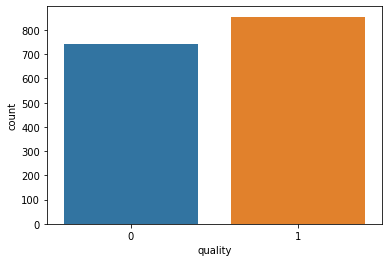

In [3]:
wine = pd.read_csv('datasets/wine-quality/winequality-red.csv', sep=';')
# Preprocess the data
bins = (2, 5.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=group_names)
wine['quality'].unique()

label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

# separate the dataset as response variable and feature variables
wineX = wine.drop('quality', axis=1)
winey = wine['quality']
wine_labels = ['bad wine', 'good wine']
wineX_scaled = scale(wineX)

# look at distribution
wine_null = calculate_null_accuracy(winey)
print("Null Accuracy: %.2f %%" % (wine_null*100))

sns.countplot(wine['quality'])

## Digits

Null Accuracy: 10.18 %


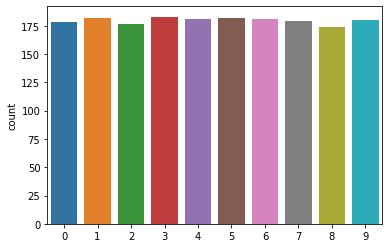

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()

digitsX = digits.data
digitsy = digits.target
digits_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
digitsX_scaled = scale(digitsX)

# look at distribution
digits_null = calculate_null_accuracy(digitsy)
print("Null Accuracy: %.2f %%" % (digits_null*100))

sns.countplot(digitsy)

## Test & Training Sets

In [5]:
'''
X = wineX
y = winey
labels = wine_labels
'''
X = digitsX
y = digitsy
labels = digits_labels
data = scale(X)

testSize = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=0)

numSamples, numFeatures = X.shape
numClusters = len(np.unique(y))
print("Number of samples: %d\nNumber of features: %d\nClusters: %d" %(numSamples, numFeatures, numClusters))


Number of samples: 1797
Number of features: 64
Clusters: 10


## Report Notes
Reading in data and scaling all feature values. 

### Wine
- Samples = 1599
- Features = 11
- Null Accuracy = 53.47%

### Digits
- Samples = 1797
- Features = 64
- Null Accuray = 10.18%

# Cluster


## Helper Functions



In [6]:
# kmeans plot showing elbow method and silhouette score
def kmeans_plot(dataName, data):
    sse = []
    scores = []
    for i in range(2,15):
        kmeans = KMeans(n_clusters=i,init='k-means++', random_state=0)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        
        kmeans_labels = kmeans.predict(data)
        scores.append(sil_score(data, kmeans_labels))
                
    # Plot the data
    title = "K-means of " + dataName
    plt.figure(figsize=(10, 8))
    plt.suptitle(title, y=1.05, fontsize=16)
    
    plt.subplot(211)
    plt.plot(range(2,15),sse, 'x-')
    plt.title("Sum of Squares vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum Square Error')
    plt.grid()
    
    plt.subplot(212)
    plt.plot(range(2,15),scores, 'x-')
    plt.title("Silhouette Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.grid()
    plt.show()
            
            
# expectation maximization plot showing bic and silhouette score
def em_plot(dataName, data):
    aic = []
    bic = []
    scores = []
    for i in range(2,15):
        gmm = GaussianMixture(n_components=i, random_state=0)
        gmm.fit(data)
        aic.append(gmm.aic(data))
        bic.append(gmm.bic(data))
        
        gmm_labels = gmm.predict(data)
        scores.append(sil_score(data, gmm_labels))
                
    # Plot the data
    title = "Expectation Maximization of " + dataName
    plt.figure(figsize=(10, 8))
    plt.suptitle(title, y=1.05, fontsize=16)
    
    plt.subplot(311)
    plt.plot(range(2,15), aic, 'x-')
    plt.title("AIC Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('AIC')
    plt.grid()
    
    plt.subplot(312)
    plt.plot(range(2,15), bic, 'x-')
    plt.title("BIC Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('BIC')
    plt.grid()
    
    plt.subplot(313)
    plt.plot(range(2,15),scores, 'x-')
    plt.title("Silhouette Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.grid()
    plt.show()

#kmeans_plot('Wine Quality', wineX)
#em_plot('Wine Quality', wineX)

## K-means

### Wine

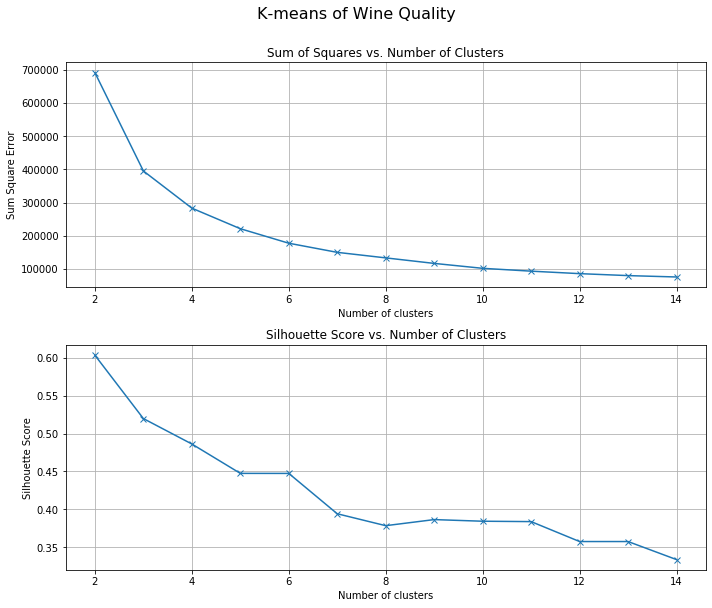

In [7]:
kmeans_plot('Wine Quality', wineX)

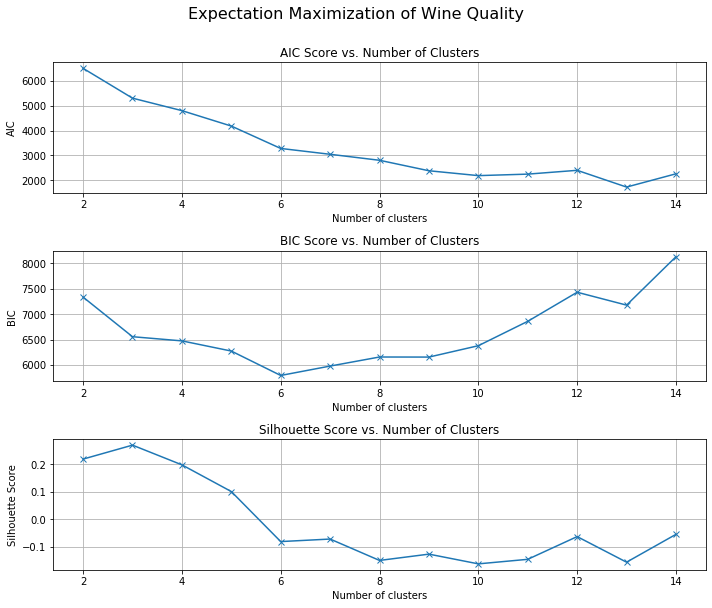

In [8]:
em_plot('Wine Quality', wineX)

### Digits

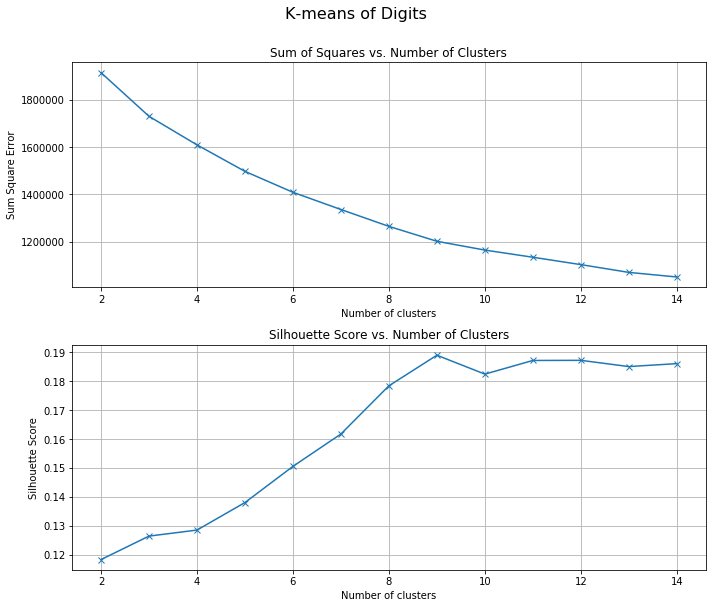

In [9]:
kmeans_plot('Digits', digitsX)

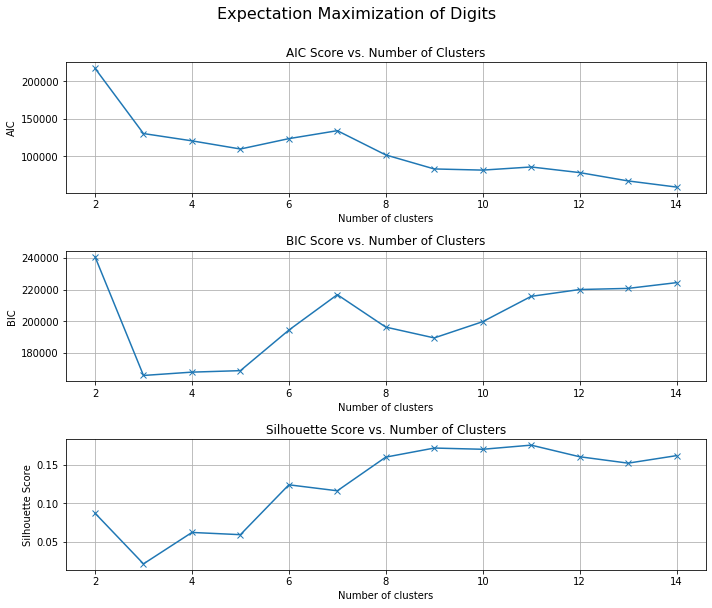

In [10]:
em_plot('Digits', digitsX)

## Report Notes
### k-means

#### Wine
- Clusters = 2
- Elbow Method at k=3 or 4
- Silhouette Score at 2

#### Digits
- Clusters = 10
- Elbow 9 or 10
- Score at 9


### Expectation Maximization

#### Wine
- Low AIC > 8
- Low BIC around 6
- Score the best around 2 or 3

#### Digits
- Low AIC between 8 to 14
- Low BIC trough between 3 and 5, and again at 8-10
- Best score around 9-11


# Dimensionality Reduction

## Helper Functions

In [11]:
# Dimensionality reduction imports
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection as RP
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.linalg import pinv
from scipy.stats import kurtosis
from scipy import sparse 


# borrowed from https://github.com/JonathanTay/CS-7641-assignment-3/
def reconstruction_error(algo, data):
    W = algo.components_
    if sparse.issparse(W):
        W = W.todense()
    p = pinv(W)
    reconstructed = ((p @ W) @ (data.T)).T
    errors = np.square(data - reconstructed)
    return np.nanmean(errors)

#
# PCA
#

def calc_pca_components(data, dataName):
    t0 = time()
    
    pca = PCA(n_components=data.shape[1], random_state=0)
    pca.fit(data)
    var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
    
    end = time() - t0
    
    plt.title('PCA Analysis for %s' % dataName)
    plt.ylabel('Cumulative % Variance')
    plt.xlabel('Number of Features')
    plt.axhline(y=95, color='gray', linestyle='--', label='95% Variance')
    plt.plot(range(1,data.shape[1]+1), var)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    
    numComponents = np.argmax(var>95) + 1
    
    
    print('%s total features: %d' %(dataName, data.shape[1]))
    print('Best Number of PCA Components: %d' % numComponents)
    print('Total Time: %.3f seconds' % end)
    
    
#
# ICA
#
def calc_ica_components(data, dataName):
    t0 = time()
    
    dimensions = data.shape[1]+1
    kurtosis = []
    for dim in range(2,dimensions):
        ica = FastICA(n_components=dim, max_iter=600, random_state=0)
        res = ica.fit_transform(data)
        tmp = pd.DataFrame(res)
        k   = tmp.kurt(axis=0)
        kurtosis.append(k.abs().mean())
        
    end = time() - t0
    
    optimalComponents = np.argmax(kurtosis)
    
    plt.title('ICA Analysis for %s' % dataName)
    plt.ylabel('Kurtosis')
    plt.xlabel('Number of Features')
    plt.plot(range(2,dimensions), kurtosis)
    plt.grid()
    plt.show()
    
    print('Total Number of Features:', data.shape[1])
    print('Best Number of ICA Components:', optimalComponents+2)
    print('Total Time: %.3f seconds' % end)
    
    return optimalComponents
    
#
# RP
#
def calc_rp_components(data, dataName, tries=100):
    t0 = time()
    
    dimensions = data.shape[1]+1
    kurtosis = []
    stddev_kurtosis = []
    lowerbound = []
    upperbound = []
    for dim in range(2,dimensions):
        kurts = []
        for t in range(tries):
            rp = RP(n_components=dim)
            res = rp.fit_transform(data)
            tmp = pd.DataFrame(res)
            k   = tmp.kurt(axis=0)
            kurts.append(k.abs().mean())
        kurtosis.append(np.mean(kurts))
        lowerbound.append(np.mean(kurts)-np.std(kurts))
        upperbound.append(np.mean(kurts)+np.std(kurts))
        
    optimalComponents = np.argmax(kurtosis)
    
    end = time() - t0
    
    plt.title('RP Analysis for %s: %d Iterations' % (dataName, tries))
    plt.ylabel('Kurtosis')
    plt.xlabel('Number of Features')
    plt.plot(range(2,dimensions), kurtosis)
    plt.fill_between(range(2, dimensions), lowerbound, upperbound, facecolor='gray', alpha=0.1)
    plt.grid()
    plt.show()
    
    print('Total Number of Features:', data.shape[1])
    print('Best Number of RP Components:', optimalComponents+2)
    print('Total Time: %.3f seconds' % end)
    
    return optimalComponents
    
#
# UFS
#
# function based on https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py
def calc_kbest(dataX, datay, dataName):
    t0 = time()
    
    kBest = SelectKBest(f_classif, k=4)
    kBest.fit(dataX, datay)
    scores = kBest.pvalues_
    scores[np.isnan(scores)]=0 # get rid of NaN's
    scores += 1e-308           # get rid of zero values
    scores = -np.log10(scores)
    scores /= scores.max()
    
    plt.title('UFS Analysis for %s' % dataName)
    plt.ylabel('Normalized Univariate Score')
    plt.xlabel('Feature Number')
    plt.bar(np.arange(dataX.shape[-1]),scores)
    plt.grid(alpha=0.3)
    plt.show()

    end = time() - t0
    print('Total Time: %.3f seconds' % end)


#calc_pca_components(wineX_scaled, 'Wine Quality')
#calc_ica_components(wineX_scaled, 'Wine Quality')
#calc_rp_components(wineX_scaled, 'Wine Quality')
#calc_kbest(wineX_scaled, winey, 'Wine Quality')


#calc_pca_components(digitsX_scaled, 'Digits')
#calc_ica_components(digitsX_scaled, 'Digits')
#calc_rp_components(digitsX_scaled, 'Digits')
#calc_kbest(digitsX_scaled, digitsy, 'Digits')

## Wine

--------------------------------------------------------------------------------
*  Wine PCA  *
--------------------------------------------------------------------------------


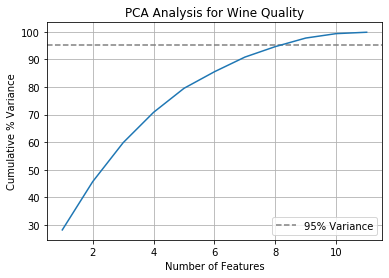

Wine Quality total features: 11
Best Number of PCA Components: 9
Total Time: 0.012 seconds
PCA Reconstruction Error:  5.296722553830842e-31
--------------------------------------------------------------------------------
*  Wine ICA  *
--------------------------------------------------------------------------------


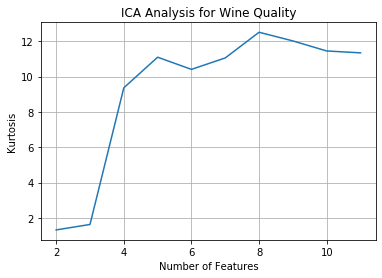

Total Number of Features: 11
Best Number of ICA Components: 8
Total Time: 0.092 seconds
ICA Reconstruction Error:  0.14475286492356385
--------------------------------------------------------------------------------
*  Wine RP  *
--------------------------------------------------------------------------------


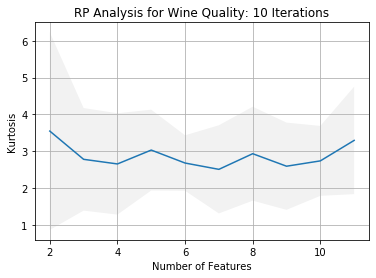

Total Number of Features: 11
Best Number of RP Components: 2
Total Time: 0.093 seconds


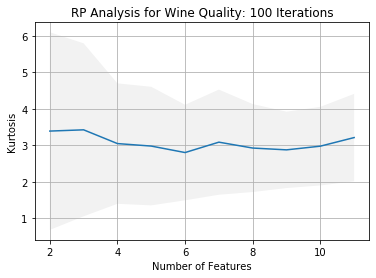

Total Number of Features: 11
Best Number of RP Components: 3
Total Time: 0.863 seconds
ICA Reconstruction Error:  0.8792678251948076
--------------------------------------------------------------------------------
*  Wine UFS  *
--------------------------------------------------------------------------------


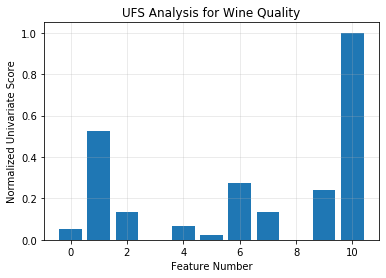

Total Time: 0.151 seconds


In [12]:
#
# PCA
#
print_line('Wine PCA')
wine_pca_components = calc_pca_components(wineX_scaled, 'Wine Quality')
winePCA = PCA(n_components=wine_pca_components, random_state=0).fit(wineX_scaled)
wine_pca_sse = reconstruction_error(winePCA, wineX_scaled)
print('PCA Reconstruction Error: ', wine_pca_sse)



#
# ICA
#
print_line('Wine ICA')
wine_ica_components = calc_ica_components(wineX_scaled, 'Wine Quality')
wineICA = FastICA(n_components=wine_ica_components, random_state=0).fit(wineX_scaled)
wine_ica_sse = reconstruction_error(wineICA, wineX_scaled)
print('ICA Reconstruction Error: ', wine_ica_sse)


#
# RP
#
print_line('Wine RP')
wine_rp_components = calc_rp_components(wineX_scaled, 'Wine Quality', 10)
wine_rp_components = calc_rp_components(wineX_scaled, 'Wine Quality', 100)
wineRP = RP(n_components=wine_rp_components, random_state=0).fit(wineX_scaled)
wine_rp_sse = reconstruction_error(wineRP, wineX_scaled)
print('ICA Reconstruction Error: ', wine_rp_sse)


#
# UFS
#
print_line('Wine UFS')
calc_kbest(wineX_scaled, winey, 'Wine Quality')

## Digits


--------------------------------------------------------------------------------
*  Digits PCA  *
--------------------------------------------------------------------------------


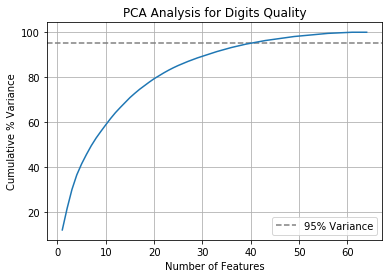

Digits Quality total features: 64
Best Number of PCA Components: 40
Total Time: 0.013 seconds
PCA Reconstruction Error:  2.566011023416891e-30
--------------------------------------------------------------------------------
*  Digits ICA  *
--------------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Cons

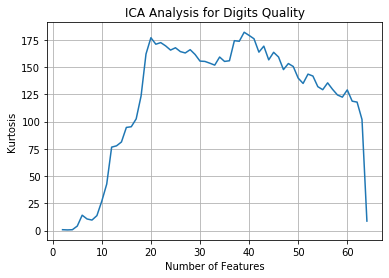

Total Number of Features: 64
Best Number of ICA Components: 39
Total Time: 11.089 seconds
ICA Reconstruction Error:  0.059863668637683824
--------------------------------------------------------------------------------
*  Digits RP  *
--------------------------------------------------------------------------------


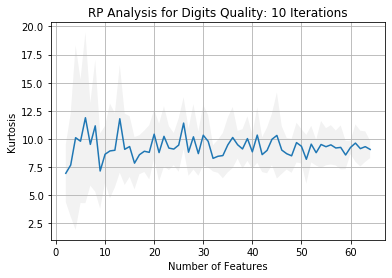

Total Number of Features: 64
Best Number of RP Components: 6
Total Time: 1.173 seconds


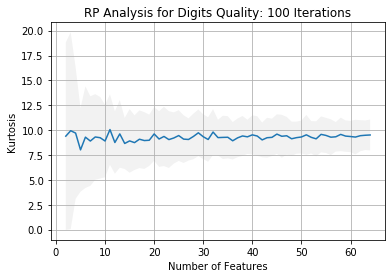

Total Number of Features: 64
Best Number of RP Components: 11
Total Time: 11.786 seconds
ICA Reconstruction Error:  0.803200635593496
--------------------------------------------------------------------------------
*  Digits UFS  *
--------------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 0 32 39] are constant.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


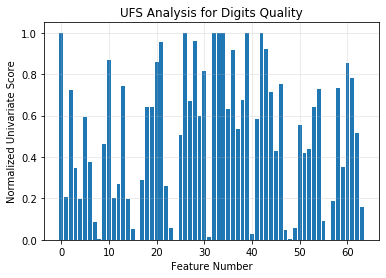

Total Time: 0.228 seconds


In [13]:
#
# PCA
#
print_line('Digits PCA')
digits_pca_components = calc_pca_components(digitsX_scaled, 'Digits Quality')
digitsPCA = PCA(n_components=digits_pca_components, random_state=0).fit(digitsX_scaled)
digits_pca_sse = reconstruction_error(digitsPCA, digitsX_scaled)
print('PCA Reconstruction Error: ', digits_pca_sse)



#
# ICA
#
print_line('Digits ICA')
digits_ica_components = calc_ica_components(digitsX_scaled, 'Digits Quality')
digitsICA = FastICA(n_components=digits_ica_components, random_state=0).fit(digitsX_scaled)
digits_ica_sse = reconstruction_error(digitsICA, digitsX_scaled)
print('ICA Reconstruction Error: ', digits_ica_sse)


#
# RP
#
print_line('Digits RP')
digits_rp_components = calc_rp_components(digitsX_scaled, 'Digits Quality', 10)
digits_rp_components = calc_rp_components(digitsX_scaled, 'Digits Quality', 100)
digitsRP = RP(n_components=digits_rp_components, random_state=0).fit(digitsX_scaled)
digits_rp_sse = reconstruction_error(digitsRP, digitsX_scaled)
print('ICA Reconstruction Error: ', digits_rp_sse)


#
# UFS
#
print_line('Digits UFS')
calc_kbest(digitsX_scaled, digitsy, 'Digits Quality')

# Clustering + Dimensionality Reduction
2 datasets, 4 dimensionality reductions, 2 algorithms (16 problems)

## Helper Functions

In [14]:
# Run all kmeans and plot results
def compare_kmeans(dataName, datasets):
    # Loop through all datasets
    all_sse = []
    all_scores = []
    all_methods = []
    for d in datasets:
        data   = d[1]
        sse    = []
        scores = []
        
        # try different cluster sizes
        for i in range(2,15):
            kmeans = KMeans(n_clusters=i,init='k-means++', random_state=0)
            kmeans.fit(data)
            sse.append(kmeans.inertia_)
            
            kmeans_labels = kmeans.predict(data)
            scores.append(sil_score(data, kmeans_labels))
            
        all_sse.append(sse)
        all_scores.append(scores)
        all_methods.append(d[0])
                    
    # Plot the data
    title = "K-means of " + dataName + " Using Dimensionality Reduction"
    plt.figure(figsize=(10, 8))
    plt.suptitle(title, y=1.05, fontsize=16)
    
    # create method to change line types
    lines = ["o-", "x-", "x--", "x-.", "x:"]
    
    plt.subplot(211)
    for i,sse in enumerate(all_sse):
        plt.plot(range(2,15), sse, lines[i], label=all_methods[i])
    plt.title("Sum of Squares vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum Square Error')
    plt.legend()
    plt.grid()
    
    plt.subplot(212)
    for i, score in enumerate(all_scores):
        plt.plot(range(2,15), score, lines[i], label=all_methods[i])
    plt.title("Silhouette Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.tight_layout()
    plt.grid()
    plt.show()
    
def compare_em(dataName, datasets):
    # Loop through all datasets
    all_aic     = []
    all_bic     = []
    all_scores  = []
    all_dims    = []
    all_methods = []
    for d in datasets:
        data   = d[1]
        dimensions = data.shape[1] + 1
        all_dims.append(list(range(2,dimensions)))
        
        aic    = []
        bic    = []
        scores = []
        
        for i in range(2,dimensions):
            gmm = GaussianMixture(n_components=i, random_state=0)
            gmm.fit(data)
            aic.append(gmm.aic(data))
            bic.append(gmm.bic(data))
        
            gmm_labels = gmm.predict(data)
            scores.append(sil_score(data, gmm_labels))
        
        all_aic.append(aic)
        all_bic.append(bic)
        all_scores.append(scores)
        all_methods.append(d[0])
    
    # Plot the data
    title = "EM of " + dataName + " Using Dimensionality Reduction"
    fig = plt.figure(figsize=(10, 8))
    
    plt.suptitle(title, y=1.05, fontsize=16)
    
    # create method to change line types
    lines = ["o-", "x-", "x--", "x-.", "x:"]
    
    plt.subplot(311)
    for i,aic in enumerate(all_aic):
        plt.plot(all_dims[i], aic, lines[i], label=all_methods[i])
    plt.title("AIC vs. Number of Components")
    plt.xlabel('Number of Components')
    plt.ylabel('AIC')
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.subplot(312)
    for i,bic in enumerate(all_bic):
        plt.plot(all_dims[i], bic, lines[i], label=all_methods[i])
    plt.title("BIC Score vs. Number of Components")
    plt.xlabel('Number of Components')
    plt.ylabel('BIC')
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    
    plt.subplot(313)
    for i,score in enumerate(all_scores):
        plt.plot(all_dims[i], score, lines[i], label=all_methods[i])
    plt.title("Silhouette Score vs. Number of Components")
    plt.xlabel('Number of Components')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
# Testers
#compare_kmeans('Wine Quality', wine_data)
#compare_kmeans('Digits', digits_data)
#compare_em('Wine Quality', wine_data)
#compare_em('Digits', digits_data)


# code based on example found at:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
def bench_kmeans(estimator, labels, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_, metric='euclidean')))
   
def bench_em(estimator, labels, name, data):
    t0 = time()
    estimator.fit(data)
    gmm_labels = estimator.predict(data)
    print('%-9s\t%.2fs\t%i\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.aic(data), estimator.bic(data),
             metrics.homogeneity_score(labels, gmm_labels),
             metrics.completeness_score(labels, gmm_labels),
             metrics.v_measure_score(labels, gmm_labels),
             metrics.adjusted_rand_score(labels, gmm_labels),
             metrics.adjusted_mutual_info_score(labels,  gmm_labels),
             metrics.silhouette_score(data, gmm_labels, metric='euclidean')))
    
# Testers
#bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=winey, name="Original",  data=wineX_scaled)
#bench_em(GaussianMixture(n_components=8, random_state=0), labels=winey, name="Original", data=wineX_scaled)

## Wine
### Data Reduction
Perform dimensionality reduction based on the results found in the previous section

In [15]:
# reduce wine data set
winePCA = PCA(n_components=9, random_state=0).fit_transform(wineX_scaled)
wineICA = FastICA(n_components=8, random_state=0).fit_transform(wineX_scaled)
wineRP  = RP(n_components=8, random_state=0).fit_transform(wineX_scaled)
wineUFS = SelectKBest(f_classif, k=4).fit_transform(wineX_scaled, winey)

wine_data = []
wine_data.append(['Original', wineX_scaled])
wine_data.append(['PCA', winePCA])
wine_data.append(['ICA', wineICA])
wine_data.append(['RP',  wineRP])
wine_data.append(['UFS', wineUFS])

# reduce digits dataset

# delete columns with no unique information
digitsPCA = PCA(n_components=40, random_state=0).fit_transform(digitsX_scaled)
digitsICA = FastICA(n_components=39, random_state=0).fit_transform(digitsX_scaled)
digitsRP  = RP(n_components=15, random_state=0).fit_transform(digitsX_scaled)

# delete columns with no unique information
trimmed_digitsX_scaled = digitsX_scaled[:, ~np.all(digitsX_scaled[1:] == digitsX_scaled[:-1], axis=0)]
digitsUFS = SelectKBest(f_classif, k=12).fit_transform(trimmed_digitsX_scaled, digitsy)

digits_data = []
digits_data.append(['Original', digitsX_scaled])
digits_data.append(['PCA', digitsPCA])
digits_data.append(['ICA', digitsICA])
digits_data.append(['RP',  digitsRP])
digits_data.append(['UFS', digitsUFS])

### K-means

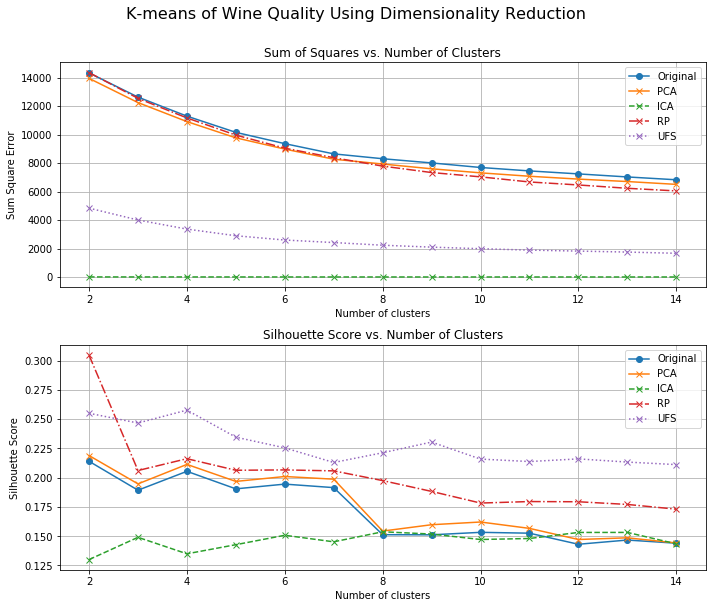

--------------------------------------------------------------------------------
*  K-Means Wine Benchmark  *
--------------------------------------------------------------------------------
init		time	inertia	homog	compl	v-meas	ARI	AMI	silhouette
_____________________________________________________________________________________
Original 	0.05s	14330	0.029	0.030	0.030	0.029	0.029	0.214
PCA-based	0.04s	13945	0.029	0.031	0.030	0.030	0.030	0.219
ICA-based	0.06s	7	0.083	0.087	0.085	0.091	0.084	0.122
RP-based 	0.03s	14349	0.002	0.002	0.002	0.000	0.002	0.305
UFS-based	0.03s	4835	0.146	0.148	0.147	0.177	0.147	0.255


In [16]:
# Create k-means plots
compare_kmeans('Wine Quality', wine_data)

# Create k-means benchmark table
print_line('K-Means Wine Benchmark')
print('init\t\ttime\tinertia\thomog\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print(85*'_')
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=winey, name="Original",  data=wineX_scaled)
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=winey, name="PCA-based", data=winePCA)
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=winey, name="ICA-based", data=wineICA)
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=winey, name="RP-based",  data=wineRP)
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=winey, name="UFS-based", data=wineUFS)


### Expectation Maximization

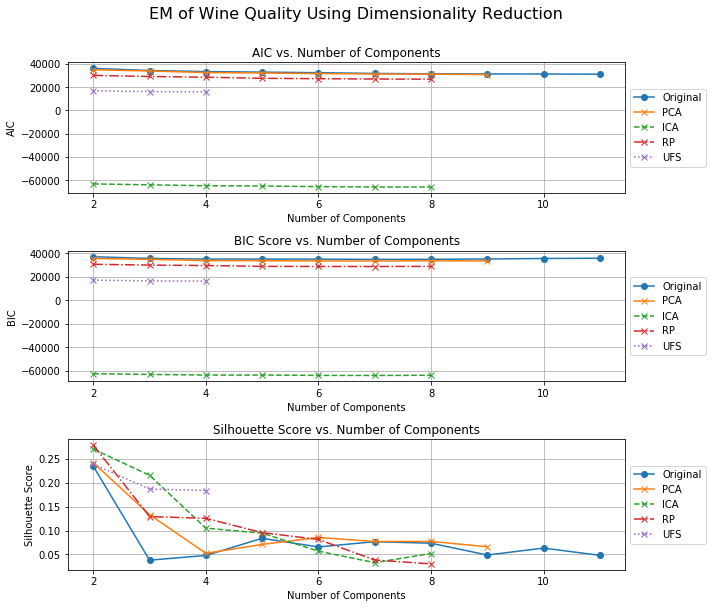

--------------------------------------------------------------------------------
*  EM Wine Benchmark  *
--------------------------------------------------------------------------------
init		time	aic	bic	homog	compl	v-meas	ARI	AMI	silhouette
_____________________________________________________________________________________
Original 	0.18s	31421	34771	0.121	0.044	0.065	0.058	0.063	0.073
PCA-based	0.07s	31095	33456	0.132	0.049	0.072	0.065	0.070	0.077
ICA-based	0.11s	-65805	-63875	0.124	0.046	0.067	0.057	0.065	0.052
RP-based 	0.10s	26806	28736	0.138	0.052	0.076	0.057	0.074	0.030
UFS-based	0.10s	15460	16100	0.200	0.071	0.105	0.076	0.104	0.104


In [17]:
# Create k-means plots
compare_em('Wine Quality', wine_data)

# Create k-means benchmark table
print_line('EM Wine Benchmark')
print('init\t\ttime\taic\tbic\thomog\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print(85*'_')
bench_em(GaussianMixture(n_components=8, random_state=0), labels=winey, name="Original",  data=wineX_scaled)
bench_em(GaussianMixture(n_components=8, random_state=0), labels=winey, name="PCA-based", data=winePCA)
bench_em(GaussianMixture(n_components=8, random_state=0), labels=winey, name="ICA-based", data=wineICA)
bench_em(GaussianMixture(n_components=8, random_state=0), labels=winey, name="RP-based",  data=wineRP)
bench_em(GaussianMixture(n_components=8, random_state=0), labels=winey, name="UFS-based", data=wineUFS)

## Digits
### K-means

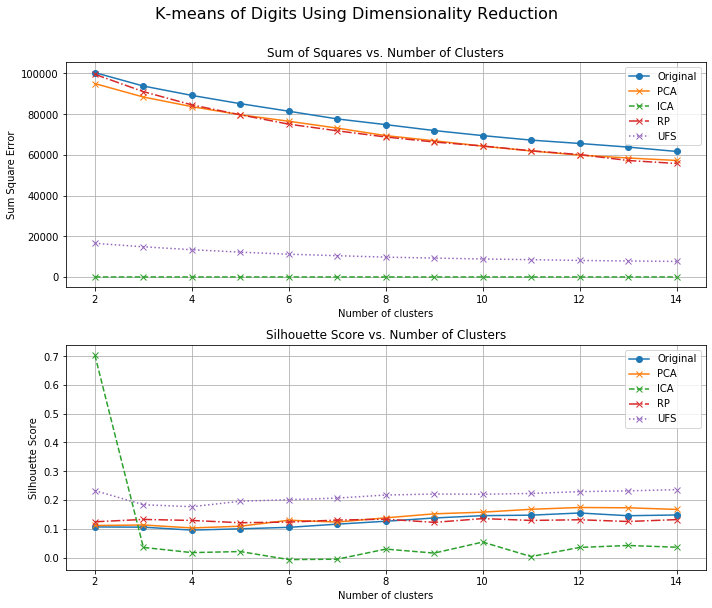

--------------------------------------------------------------------------------
*  K-Means Digits Benchmark  *
--------------------------------------------------------------------------------
init		time	inertia	homog	compl	v-meas	ARI	AMI	silhouette
_____________________________________________________________________________________
Original 	0.19s	69701	0.673	0.712	0.692	0.559	0.689	0.140
PCA-based	0.15s	64095	0.565	0.637	0.599	0.440	0.594	0.152
ICA-based	0.24s	32	0.467	0.562	0.510	0.359	0.505	0.035
RP-based 	0.14s	63634	0.358	0.401	0.379	0.269	0.372	0.124
UFS-based	0.10s	8875	0.692	0.696	0.694	0.641	0.691	0.220


In [18]:
# Create plots
compare_kmeans('Digits', digits_data)

# Create benchmark table
print_line('K-Means Digits Benchmark')
print('init\t\ttime\tinertia\thomog\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print(85*'_')
bench_kmeans(KMeans(init='k-means++', n_clusters=10), labels=digitsy, name="Original",  data=digitsX_scaled)
bench_kmeans(KMeans(init='k-means++', n_clusters=10), labels=digitsy, name="PCA-based", data=digitsPCA)
bench_kmeans(KMeans(init='k-means++', n_clusters=10), labels=digitsy, name="ICA-based", data=digitsICA)
bench_kmeans(KMeans(init='k-means++', n_clusters=10), labels=digitsy, name="RP-based",  data=digitsRP)
bench_kmeans(KMeans(init='k-means++', n_clusters=10), labels=digitsy, name="UFS-based", data=digitsUFS)


### Expectation Maximization

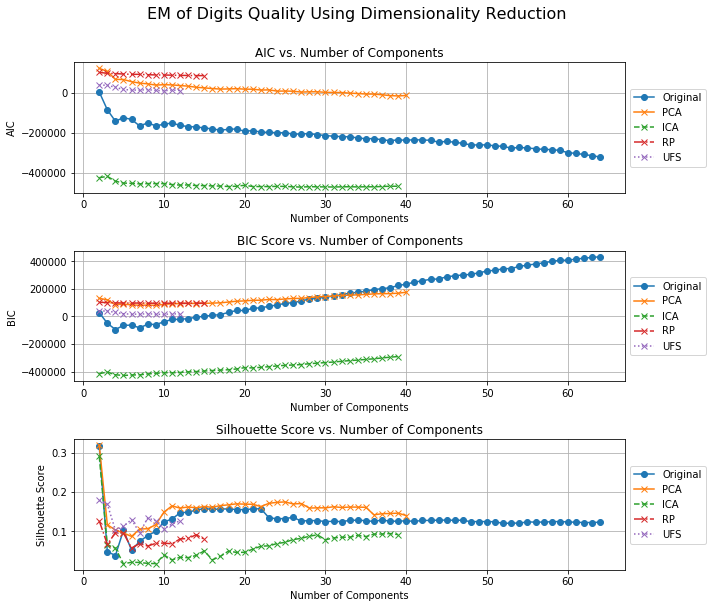

--------------------------------------------------------------------------------
*  EM Digits Benchmark  *
--------------------------------------------------------------------------------
init		time	aic	bic	homog	compl	v-meas	ARI	AMI	silhouette
_____________________________________________________________________________________
Original 	1.03s	-237537	233831	0.879	0.590	0.706	0.425	0.696	0.127
PCA-based	0.35s	-13549	175653	0.859	0.585	0.696	0.426	0.685	0.140
ICA-based	0.46s	-467138	-286945	0.821	0.560	0.666	0.411	0.654	0.094
RP-based 	0.76s	80484	110365	0.687	0.463	0.553	0.303	0.537	0.086
UFS-based	0.72s	-1165	18826	0.698	0.500	0.583	0.345	0.565	0.015


In [19]:
# Create k-means plots
compare_em('Digits Quality', digits_data)

# Create k-means benchmark table
print_line('EM Digits Benchmark')
print('init\t\ttime\taic\tbic\thomog\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print(85*'_')
bench_em(GaussianMixture(n_components=40, random_state=0), labels=digitsy, name="Original",  data=digitsX_scaled)
bench_em(GaussianMixture(n_components=40, random_state=0), labels=digitsy, name="PCA-based", data=digitsPCA)
bench_em(GaussianMixture(n_components=40, random_state=0), labels=digitsy, name="ICA-based", data=digitsICA)
bench_em(GaussianMixture(n_components=40, random_state=0), labels=digitsy, name="RP-based",  data=digitsRP)
bench_em(GaussianMixture(n_components=40, random_state=0), labels=digitsy, name="UFS-based", data=digitsUFS)

# NN with Dimensionality Reduction
Apply the dimensionality reduction algorithms to one of your datasets from assignment 1 (already done above (one wine set)) and rerun your neural network learner on the newly projected data.

## Helper Functions

In [20]:
# Function based on:
# https://chrisalbon.com/machine_learning/model_evaluation/plot_the_learning_curve/
def plot_learning_curve(clf, X, y, title='Learning Curve'):
    train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
                                                        clf, 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 20),
                                                        return_times = True,
                                                        random_state = 0)

    # ------------------------------------------------------------------------------------------
    # Plot Learning Curve
    # ------------------------------------------------------------------------------------------
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.figure(1)
    plt.plot(train_sizes, train_mean, '--', label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', label="Cross-validation score")
    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

    # Create learning curve plot
    plt.title(title)
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.grid()
    plt.show()
    
    # ------------------------------------------------------------------------------------------
    # Plot Scalability Curve
    # ------------------------------------------------------------------------------------------
    # Create mean and std of training times
    train_times_mean = np.mean(fit_times, axis=1)
    train_times_std  = np.std(fit_times, axis=1)
    
    # plot lines
    plt.figure(2)
    plt.plot(train_sizes, train_times_mean, 'o-')
    plt.fill_between(train_sizes, train_times_mean - train_times_std, train_times_mean + train_times_std, color='#DDDDDD')
    plt.title('Training Scalability')
    plt.xlabel('Training Set Size')
    plt.ylabel('Fit Times (s)')
    plt.grid()
    plt.show()
    
# Function based on:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion(clf, X_test, y_test, labels):
    
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                     display_labels=labels,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

        #print(title)
        #print(disp.confusion_matrix)
        plt.show()

    plt.show()
    
    return 0

## Reduced Data

In [21]:
# split into train and test sets

# reduce wine data set
winePCA = PCA(n_components=9, random_state=0).fit_transform(wineX_scaled)
wineICA = FastICA(n_components=8, random_state=0).fit_transform(wineX_scaled)
wineRP  = RP(n_components=8, random_state=0).fit_transform(wineX_scaled)
wineUFS = SelectKBest(f_classif, k=4).fit_transform(wineX_scaled, winey)

wine_data = []
wine_data.append(['Original', wineX_scaled])
wine_data.append(['PCA', winePCA])
wine_data.append(['ICA', wineICA])
wine_data.append(['RP',  wineRP])
wine_data.append(['UFS', wineUFS])


## Neural Net Training

--------------------------------------------------------------------------------
*  Original  *
--------------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Neural Net model fit in 69.557 s
Best Score: 0.777 using {'hidden_layer_sizes': (40, 10), 'learning_rate': 'constant', 'solver': 'lbfgs'}


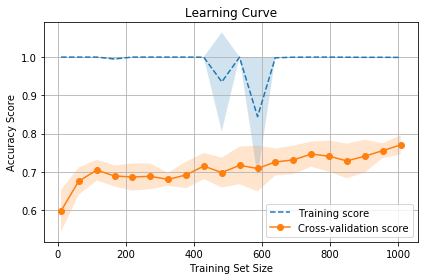

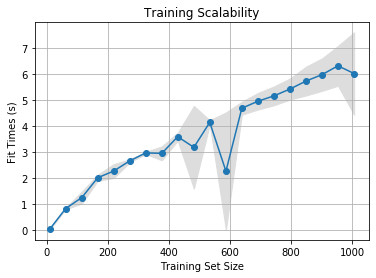

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       226
           1       0.73      0.72      0.73       254

    accuracy                           0.71       480
   macro avg       0.71      0.71      0.71       480
weighted avg       0.71      0.71      0.71       480



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


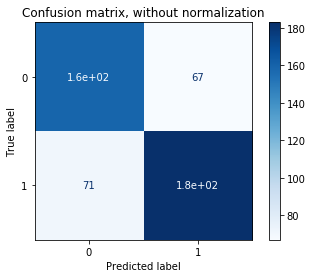

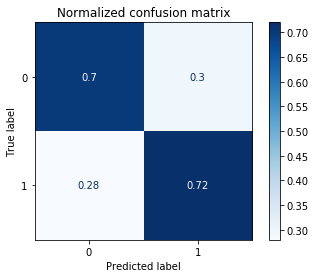

--------------------------------------------------------------------------------
*  PCA  *
--------------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Neural Net model fit in 66.164 s
Best Score: 0.770 using {'hidden_layer_sizes': (20, 20), 'learning_rate': 'constant', 'solver': 'lbfgs'}


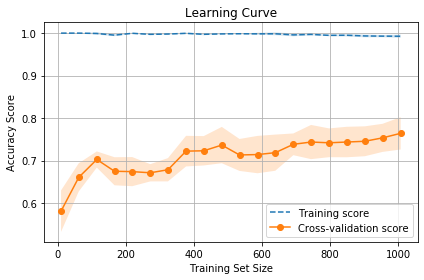

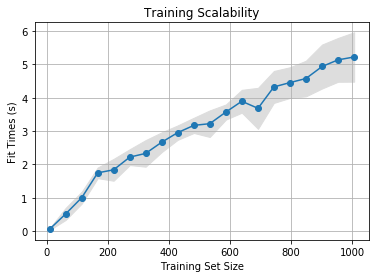

              precision    recall  f1-score   support

           0       0.71      0.68      0.70       226
           1       0.73      0.75      0.74       254

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


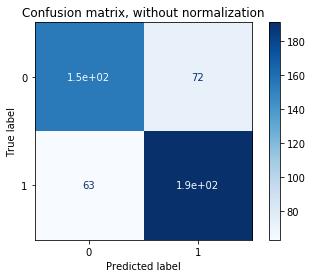

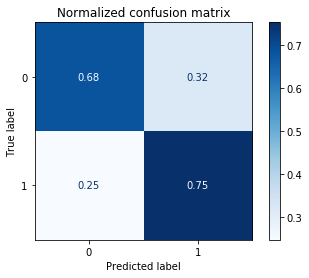

--------------------------------------------------------------------------------
*  ICA  *
--------------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Neural Net model fit in 66.513 s
Best Score: 0.760 using {'hidden_layer_sizes': (40, 20), 'learning_rate': 'constant', 'solver': 'lbfgs'}


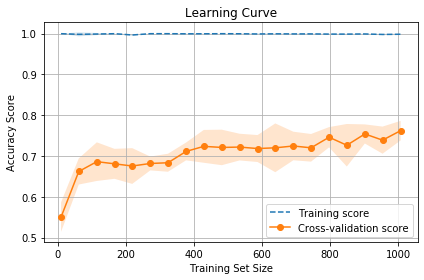

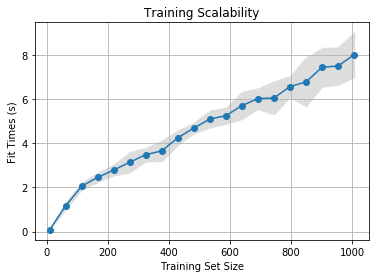

              precision    recall  f1-score   support

           0       0.69      0.66      0.68       226
           1       0.71      0.73      0.72       254

    accuracy                           0.70       480
   macro avg       0.70      0.70      0.70       480
weighted avg       0.70      0.70      0.70       480



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


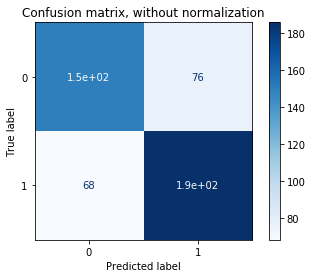

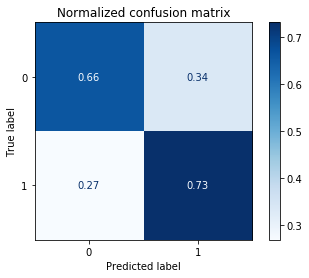

--------------------------------------------------------------------------------
*  RP  *
--------------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Neural Net model fit in 76.505 s
Best Score: 0.770 using {'hidden_layer_sizes': (40, 20), 'learning_rate': 'constant', 'solver': 'lbfgs'}


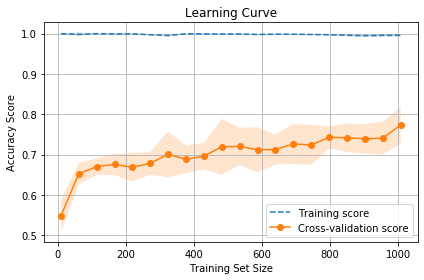

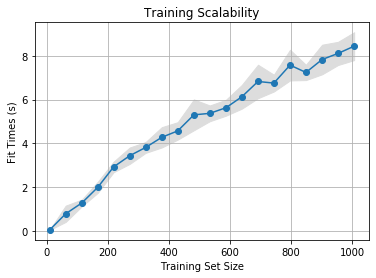

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       226
           1       0.73      0.76      0.74       254

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


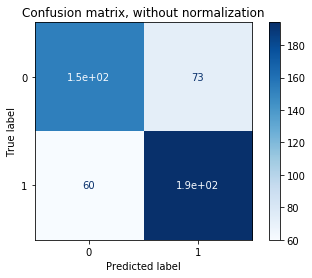

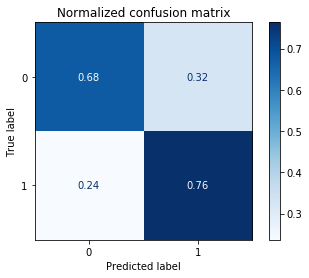

--------------------------------------------------------------------------------
*  UFS  *
--------------------------------------------------------------------------------
Neural Net model fit in 56.081 s
Best Score: 0.761 using {'hidden_layer_sizes': (20, 10), 'learning_rate': 'constant', 'solver': 'lbfgs'}


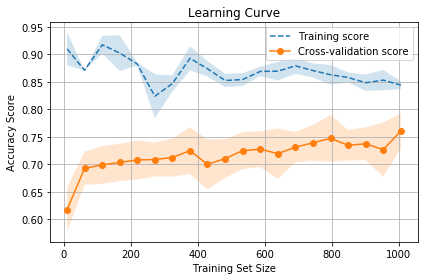

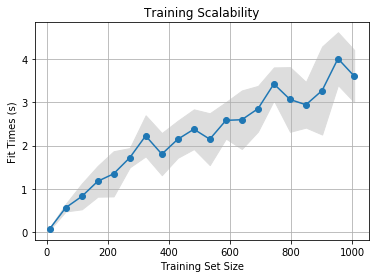

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       226
           1       0.74      0.79      0.76       254

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480



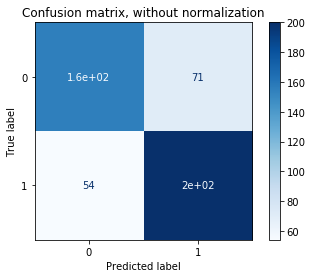

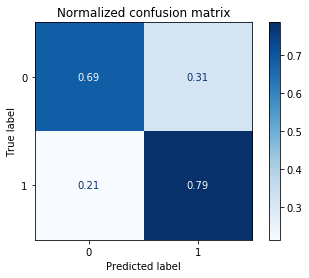

Results
Data:  Original
	Time:    69.55659866333008
	Score:   0.7766167953667954
	Params:  {'hidden_layer_sizes': (40, 10), 'learning_rate': 'constant', 'solver': 'lbfgs'}
Data:  PCA
	Time:    66.16384792327881
	Score:   0.7703587516087517
	Params:  {'hidden_layer_sizes': (20, 20), 'learning_rate': 'constant', 'solver': 'lbfgs'}
Data:  ICA
	Time:    66.51349329948425
	Score:   0.7604890604890604
	Params:  {'hidden_layer_sizes': (40, 20), 'learning_rate': 'constant', 'solver': 'lbfgs'}
Data:  RP
	Time:    76.5049057006836
	Score:   0.7703185328185328
	Params:  {'hidden_layer_sizes': (40, 20), 'learning_rate': 'constant', 'solver': 'lbfgs'}
Data:  UFS
	Time:    56.0811767578125
	Score:   0.7605131917631918
	Params:  {'hidden_layer_sizes': (20, 10), 'learning_rate': 'constant', 'solver': 'lbfgs'}


In [22]:
# Define Grid Search parameters
learning_rates = ['constant', 'invscaling']
solvers = ['sgd', 'lbfgs', 'adam']
layers = [(10,), (20,), (40,), (10,10), (20, 10), (20,20), (40,10), (40,20)]
parameters = {'solver': solvers, 'learning_rate': learning_rates, 'hidden_layer_sizes': layers}

# define size of test set
test_size=0.3

# collect all results
nn_data = []

for d in wine_data:
    dataName = d[0]
    print_line(dataName)
    
    X = d[1]
    y = winey
    
    # Scale the data
    X = scale(X)
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    
    clf = GridSearchCV(MLPClassifier(max_iter=2000, alpha=1, random_state=0),
                       parameters,
                       cv=10,
                       scoring='accuracy',
                       n_jobs=-1)
                
    t0 = time()
    clf.fit(X_train, y_train)
    nn_time = time() - t0
    
    print("Neural Net model fit in %.3f s" % nn_time)
    print('Best Score: %.3f using %r' % (clf.best_score_, clf.best_params_))
    
    # Create NN with best parameters from grid search
    nn = MLPClassifier(learning_rate=clf.best_params_["learning_rate"],
                       solver=clf.best_params_["solver"],
                       hidden_layer_sizes=clf.best_params_["hidden_layer_sizes"],
                       max_iter=2000,
                       alpha=1,
                       random_state=0)
    
    # plot the learning curve for the data
    plot_learning_curve(nn, X_train, y_train)

    # Predict results using the test set
    nn.fit(X_train, y_train)
    nn_pred = nn.predict(X_test)
    
    # Calculate Null Accuracy
    calculate_null_accuracy(y)
    
    # let's see how our model performed
    print(classification_report(y_test, nn_pred))
    
    plot_confusion(nn, X_test, y_test, labels)
    
    
    # Collect results
    results = {
        "classifier": nn,
        "dataset": dataName,
        "time":    nn_time,
        "score":   clf.best_score_,
        "params":  clf.best_params_
    }
    
    nn_data.append(results)

print('Results')
for res in nn_data:
    print('Data: ',     res["dataset"])
    print('\tTime:   ', res["time"])
    print('\tScore:  ', res["score"])
    print('\tParams: ', res["params"])

# NN with Dimensionality Reduction and Clustering Applied to Dataset

## K-means

In [44]:
# create dataset

# cluster data and predict labels
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=0)
kmeans.fit(wineX_scaled)
kmeans_labels = kmeans.predict(wineX_scaled)

label_diff = (kmeans_labels - winey)
label_diff = label_diff[label_diff != 0]
print('Correct Labels: %d/%d, %.2f percent' %(len(winey)-len(label_diff), len(winey), (len(winey)-len(label_diff))/len(winey)*100))

# add in cluster labels as additional feature
kmeans_wineX = np.c_[wineX_scaled, kmeans_labels]

X = kmeans_wineX
y = winey

Correct Labels: 938/1599, 58.66 percent


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Neural Net model fit in 77.445 s
Best Score: 0.784 using {'hidden_layer_sizes': (40, 10), 'learning_rate': 'constant', 'solver': 'lbfgs'}


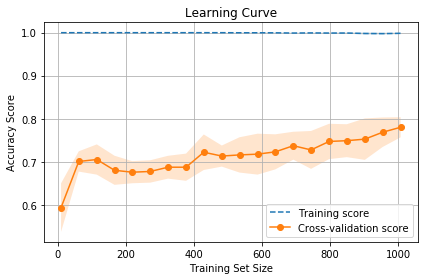

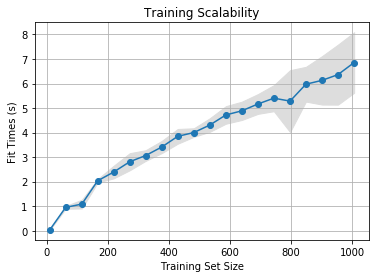

              precision    recall  f1-score   support

           0       0.71      0.68      0.70       226
           1       0.73      0.76      0.74       254

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


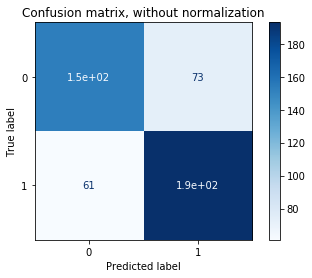

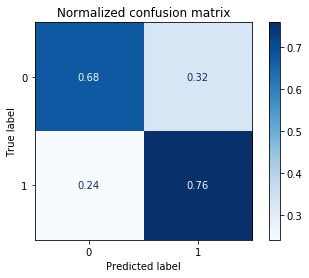

0

In [24]:
# Train Neural net

learning_rates = ['constant', 'invscaling']
solvers = ['sgd', 'lbfgs', 'adam']
layers = [(10,), (20,), (40,), (10,10), (20, 10), (20,20), (40,10), (40,20)]
parameters = {'solver': solvers, 'learning_rate': learning_rates, 'hidden_layer_sizes': layers}

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = GridSearchCV(MLPClassifier(max_iter=2000, alpha=1, random_state=0),
                   parameters,
                   cv=10,
                   scoring='accuracy',
                   n_jobs=-1)
            
t0 = time()
clf.fit(X_train, y_train)
nn_time = time() - t0

print("Neural Net model fit in %.3f s" % nn_time)
print('Best Score: %.3f using %r' % (clf.best_score_, clf.best_params_))

# Create NN with best parameters from grid search
nn = MLPClassifier(learning_rate=clf.best_params_["learning_rate"],
                   solver=clf.best_params_["solver"],
                   hidden_layer_sizes=clf.best_params_["hidden_layer_sizes"],
                   max_iter=2000,
                   alpha=1,
                   random_state=0)

# plot the learning curve for the data
plot_learning_curve(nn, X_train, y_train)

# Predict results using the test set
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)

# Calculate Null Accuracy
calculate_null_accuracy(y)

# let's see how our model performed
print(classification_report(y_test, nn_pred))

plot_confusion(nn, X_test, y_test, labels)

## Expectation Maximization

In [45]:
# create dataset

# cluster data and predict labels
em = GaussianMixture(n_components=2, random_state=0)
em.fit(wineX_scaled)
em_labels = em.predict(wineX_scaled)

label_diff = (em_labels - winey)
label_diff = label_diff[label_diff != 0]
print('Correct Labels: %d/%d, %.2f percent' %(len(winey)-len(label_diff), len(winey), (len(winey)-len(label_diff))/len(winey)*100))


# add in cluster labels as additional feature
em_wineX = np.c_[wineX_scaled, em_labels]

X = em_wineX
y = winey

Correct Labels: 736/1599, 46.03 percent


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Neural Net model fit in 71.026 s
Best Score: 0.769 using {'hidden_layer_sizes': (20, 10), 'learning_rate': 'constant', 'solver': 'lbfgs'}


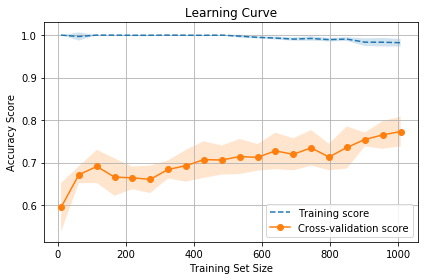

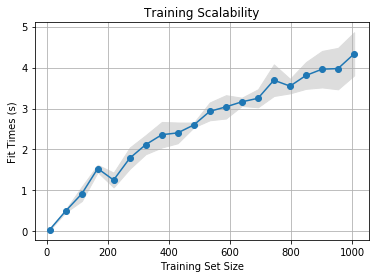

              precision    recall  f1-score   support

           0       0.74      0.69      0.72       226
           1       0.74      0.78      0.76       254

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


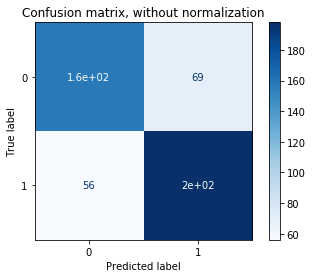

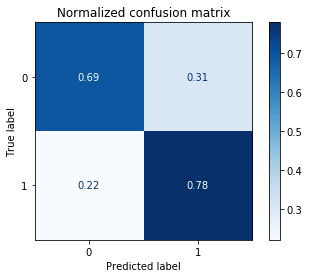

0

In [26]:
# Train Neural net

learning_rates = ['constant', 'invscaling']
solvers = ['sgd', 'lbfgs', 'adam']
layers = [(10,), (20,), (40,), (10,10), (20, 10), (20,20), (40,10), (40,20)]
parameters = {'solver': solvers, 'learning_rate': learning_rates, 'hidden_layer_sizes': layers}

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = GridSearchCV(MLPClassifier(max_iter=2000, alpha=1, random_state=0),
                   parameters,
                   cv=10,
                   scoring='accuracy',
                   n_jobs=-1)
            
t0 = time()
clf.fit(X_train, y_train)
nn_time = time() - t0

print("Neural Net model fit in %.3f s" % nn_time)
print('Best Score: %.3f using %r' % (clf.best_score_, clf.best_params_))

# Create NN with best parameters from grid search
nn = MLPClassifier(learning_rate=clf.best_params_["learning_rate"],
                   solver=clf.best_params_["solver"],
                   hidden_layer_sizes=clf.best_params_["hidden_layer_sizes"],
                   max_iter=2000,
                   alpha=1,
                   random_state=0)

# plot the learning curve for the data
plot_learning_curve(nn, X_train, y_train)

# Predict results using the test set
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)

# Calculate Null Accuracy
calculate_null_accuracy(y)

# let's see how our model performed
print(classification_report(y_test, nn_pred))

plot_confusion(nn, X_test, y_test, labels)